# Linear fit example
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Definition of model

Consider controlled parameter range is [0,1]

In [2]:
# True functional dependece: parabola

def mytrue(x):
    
    return 1.2*x - x*x

    return tri

In [3]:
# Basic functions:  1, x, x^2, x^3 ...

def myfun(x,ifun):

    return np.power(x,ifun)

In [4]:
# Full fit model (linear sum of functions)

def mymodel(x,par):

    val = np.zeros(x.size)
    
    for ip in range(par.size):
        val+=par[ip]*myfun(x,ip)
        
    return val

### (2) Generate pseudo data to fit

In [5]:
# Considered values of x

xvec = np.linspace(0.05,0.95,19)

# Measurement precision

svec = np.linspace(0.02,0.03,xvec.size)
s2vec = svec*svec

# Pseudo-data

yvec = np.random.normal(mytrue(xvec),svec)

### (3) Show pseudo data

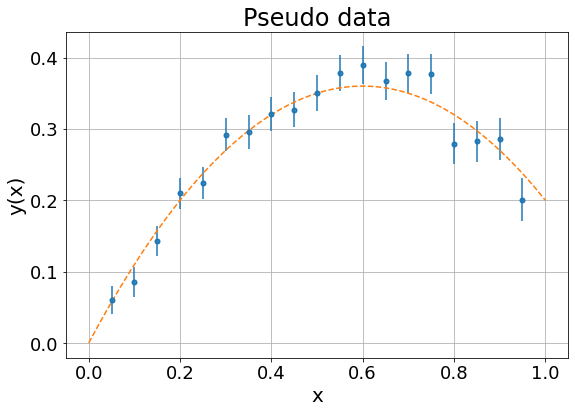

In [10]:
plt.figure(figsize=(9, 6))

plt.errorbar(xvec,yvec,svec, linestyle='none', marker='o', ms=2, mew=4)

plt.title('Pseudo data',size=24)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

xfun = np.linspace(0,1,100)
tfun = mytrue(xfun)
plt.plot(xfun,tfun,'--')

# fname = '08_fit3_data.png'
# plt.savefig(fname)

### (4)  Linear fit

In [15]:
# Number of model functions to consider 

Nfun = 3

A = np.zeros((Nfun,Nfun))

B = np.zeros(Nfun)

for l in range(Nfun):
    fl = myfun(xvec,l)
    B[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nfun):
        fk = myfun(xvec,k)
        A[l,k] = np.sum(fl*fk/s2vec)


In [16]:
# Inverse of matrix

Cov = np.linalg.inv(A)

# Solution to the problem

par = Cov @ B

# Parameter uncertainties

epar = np.sqrt(np.diagonal(Cov))

print("\n Fit results for Npar = %d\n\n     par         sigma_p\n" % (Nfun))

for ip in range(par.size):
    print("  %8.3f  +/- %6.3f " % (par[ip],epar[ip]))

# Calculate correlation matrix, including rounding

Corr = Cov

print("\n Correlation matrix\n")
for ip in range(par.size):
    for jp in range(par.size):
        Corr[ip,jp]=int(1000.*Corr[ip,jp]/epar[ip]/epar[jp]+0.5)/1000.
        
    print(Corr[ip,:])

# Fitted function

fvec = mymodel(xvec,par) 

# Chi2 printout

chi2 = np.sum((yvec-fvec)**2/s2vec)

print("\n Fit chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2,chi2/(xvec.size-Nfun)))

# Fit values for debug
#
# print("\n  x       y         f(x) ")
# for ix in range(xvec.size):
#     print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],fvec[ix]))


 Fit results for Npar = 3

     par         sigma_p

    -0.022  +/-  0.017 
     1.325  +/-  0.083 
    -1.122  +/-  0.085 

 Correlation matrix

[ 1.    -0.878  0.768]
[-0.878  1.    -0.967]
[ 0.768 -0.967  1.   ]

 Fit chi^2 =    10.571   chi^2/Ndf =  0.66070 


### (5) Draw data and fit

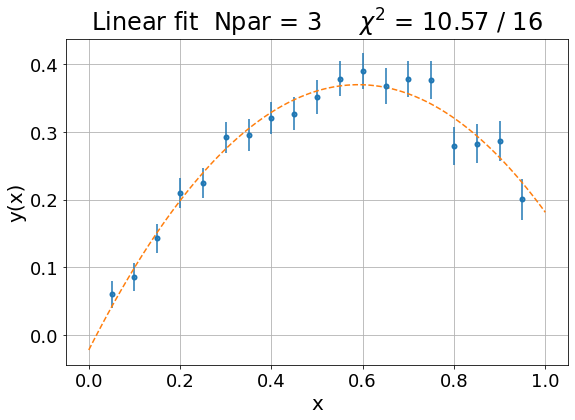

In [17]:
plt.figure(figsize=(9, 6))

plt.errorbar(xvec,yvec,svec, linestyle='none', marker='o', ms=2, mew=4)

plt.title('Linear fit  Npar = '+str(Nfun)+'     $\chi^{2}$ = '+str(int(100*chi2+0.5)/100.)+' / '+str(xvec.size-Nfun),size=24)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which='major', axis='both')

xfun = np.linspace(0,1,100)
ffun = mymodel(xfun,par)
plt.plot(xfun,ffun,'--')

fname = '08_fit3_'+str(Nfun)+'.png'
plt.savefig(fname)